A traiter avant le PreProcessing

- Identifications des outliers (PEGI_goo, nb_joueur_JVC et max_joueur_JVC)


- Nan a traiter

- variables à supprimer car identiques et trop corrélées:
    - PEGI_goo
    - PEGI_wiki
    - classification_Age_JVC

    - developpeur_goo
    - developpeur_wiki

    - meta_VUsers
    - meta_VP

    - meta_NUsers
    - meta_NP

    - meta_score
    - user_review

- Support_JVC : peut-être ne garder que les 10 modalités les plus représsentées et le reste remplacer par autre

- Global_Sales target, donc supprimer NA_Sales, JP_Sales, EU_Sales et Other_Sales qui sont très corrélées

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

In [3]:
df= pd.read_csv("gaming_total_v2.csv")
df=df.drop('Unnamed: 0', axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,developpeur_goo,PEGI_goo,developpeur_wiki,PEGI_wiki,Meta_NP,Meta_VP,Meta_NUsers,Meta_VUsers,meta_score,user_review,Rank,test_note_JVC,avis_count_JVC,avis_note_JVC,Classification_Age_JVC,max_joueurs_JVC,Support_JVC,langue_parlée_JVC,texte_JVC,nb_joueurs_JVC,game_mode,game_mode_JVC
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,NaN,Nintendo EAD,7.0,76.0,51.0,8.1,539.0,76.0,8.1,1.0,14.0,687.0,13.8,7.0,4.0,DVD,français,français,4.0,2.0,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,84.0,14.0,8.4,119.0,NaN,NaN,NaN,19.0,3.0,19.0,3.0,NaN,eShop Console Virtuelle Cartouche,NaN,NaN,NaN,NaN,1.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NaN,NaN,Nintendo EAD,3.0,82.0,73.0,8.5,1167.0,82.0,8.4,3.0,16.0,3023.0,17.4,3.0,4.0,DVD,NaN,NaN,4.0,2.0,2.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,NaN,NaN,NaN,80.0,73.0,8.3,346.0,80.0,8.2,4.0,15.0,581.0,16.5,3.0,4.0,DVD,français,français,4.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Traitement des Nans et des outliers de chaques colonnes

In [4]:
# on supprime les colonnes qui font doublons ou avec trop peu d'informations
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df=df.drop(["nb_joueurs_JVC", 'Rank', 'meta_score', 'user_review', 'max_joueurs_JVC'], axis=1)

In [5]:
df = df.dropna(subset=['Publisher', 'Year'])

In [6]:
top8_support=df['Support_JVC'].value_counts()[:8].index.tolist()

df['Support_JVC'] = df['Support_JVC'].apply(lambda x: "Autre" if x not in top8_support else x)
df['Support_JVC'] = df['Support_JVC'].fillna("autre")


In [7]:
df['texte_JVC']=df['texte_JVC'].fillna(df['texte_JVC'].mode()[0])
df['langue_parlée_JVC']=df['langue_parlée_JVC'].fillna(df['langue_parlée_JVC'].mode()[0])
df['Classification_Age_JVC']=df['Classification_Age_JVC'].fillna(df['Classification_Age_JVC'].mode()[0])
df['avis_count_JVC']=df['avis_count_JVC'][df['avis_count_JVC']<300]
df['Meta_VUsers']=df['Meta_VUsers'][df['Meta_VUsers']<30000]

In [8]:
# developpeur_wiki
# Beaucoup de Nans, quel traitement?

print(df['developpeur_wiki'].value_counts())
print(df['developpeur_wiki'].isna().sum())

developpeur_wiki
EA Canada            92
EA Tiburon           91
Capcom               64
Visual Concepts      61
Konami               52
                     ..
Square Enix PDD 2     1
Marvelous Inc.        1
Sega AM5              1
Spike Chunsoft        1
Kotobuki System       1
Name: count, Length: 969, dtype: int64
13284


In [9]:
df=df.drop('developpeur_wiki', axis=1)

Meta_NP
73.0    345
71.0    338
75.0    334
70.0    328
80.0    323
       ... 
21.0      2
22.0      2
17.0      1
13.0      1
12.0      1
Name: count, Length: 84, dtype: int64
5696


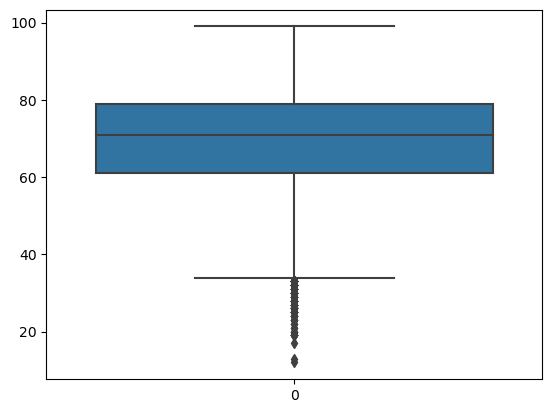

In [10]:
# Meta_NP
# quel traitement?

print(df['Meta_NP'].value_counts())
print(df['Meta_NP'].isna().sum())
sns.boxplot(df['Meta_NP']);

In [11]:
# on supprime les Nans

df = df.dropna(subset=['Meta_NP'])

Meta_VP
4.0      445
5.0      372
7.0      352
6.0      336
9.0      333
        ... 
93.0       1
107.0      1
111.0      1
113.0      1
115.0      1
Name: count, Length: 110, dtype: int64
0


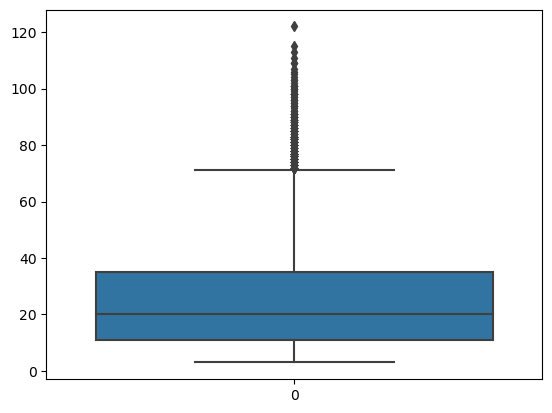

In [12]:
# Meta_VP, pas de Nans

print(df['Meta_VP'].value_counts())
print(df['Meta_VP'].isna().sum())
sns.boxplot(df['Meta_VP']);

Meta_NUsers
8.0    455
7.8    436
8.3    422
8.2    415
8.1    396
      ... 
1.7      2
0.6      1
0.8      1
1.2      1
1.1      1
Name: count, Length: 89, dtype: int64
842


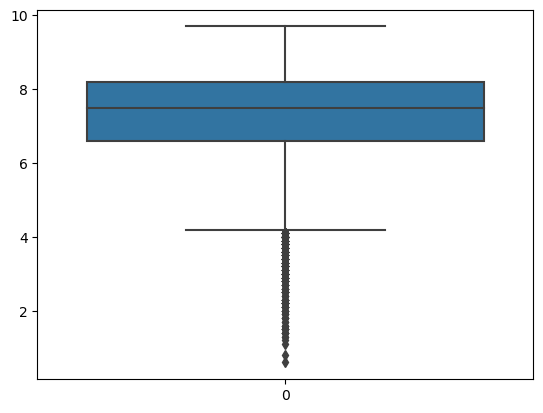

In [13]:
# Meta_NUSers
# quel traitement?

print(df['Meta_NUsers'].value_counts())
print(df['Meta_NUsers'].isna().sum())
sns.boxplot(df['Meta_NUsers']);


In [14]:
# on supprime les Nans car très peu

df = df.dropna(subset=['Meta_NUsers'])

Meta_VUsers
5.0       337
6.0       303
10.0      290
7.0       279
4.0       272
         ... 
1105.0      1
888.0       1
634.0       1
1291.0      1
613.0       1
Name: count, Length: 1103, dtype: int64
1


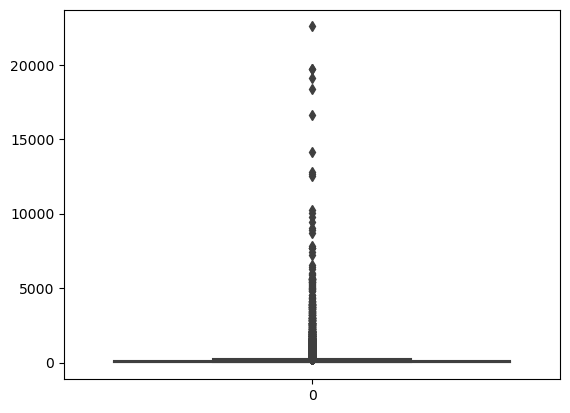

In [15]:
# Meta_VUSers
# quel traitement?

print(df['Meta_VUsers'].value_counts())
print(df['Meta_VUsers'].isna().sum())
sns.boxplot(df['Meta_VUsers']);

In [16]:
# on supprime les Nans car très peu

df = df.dropna(subset=['Meta_VUsers'])

test_note_JVC
11.0    1941
16.0     716
15.0     690
14.0     621
13.0     520
17.0     476
12.0     383
18.0     323
10.0     250
9.0      173
8.0      142
7.0       97
19.0      91
6.0       60
5.0       43
3.0       20
4.0        8
2.0        5
Name: count, dtype: int64
3224


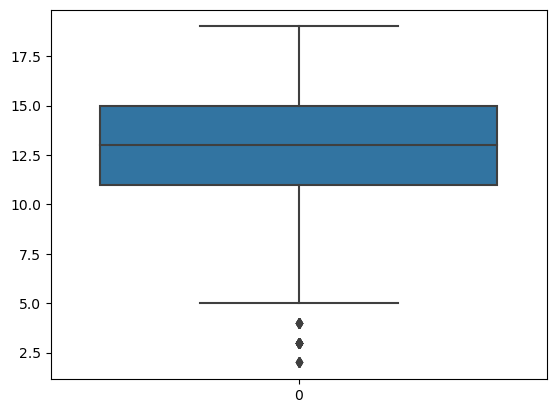

In [17]:
# test_note_JVC
# quel traitement?

print(df['test_note_JVC'].value_counts())
print(df['test_note_JVC'].isna().sum())
sns.boxplot(df['test_note_JVC']);

In [18]:
# on supprime les Nans

df = df.dropna(subset=['test_note_JVC'])

avis_count_JVC
1.0      482
0.0      411
2.0      379
3.0      270
4.0      238
        ... 
289.0      1
225.0      1
257.0      1
216.0      1
202.0      1
Name: count, Length: 279, dtype: int64
721


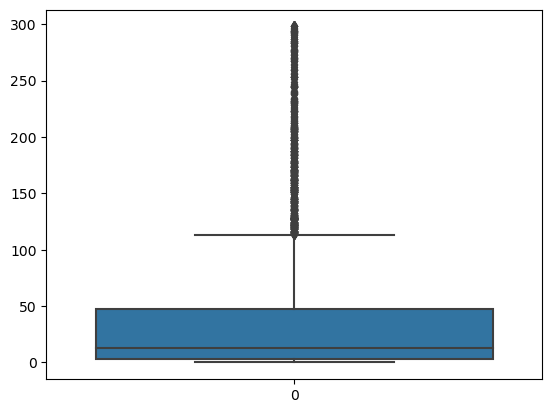

In [19]:
# avis_count_JVC
# quel traitement?

print(df['avis_count_JVC'].value_counts())
print(df['avis_count_JVC'].isna().sum())
sns.boxplot(df['avis_count_JVC']);

In [20]:
# on supprime les Nans

df = df.dropna(subset=['avis_count_JVC'])

In [21]:
# avis_note_JVC
# quel traitement?

print(df['avis_note_JVC'].value_counts())
print(df['avis_note_JVC'].isna().sum())
#sns.boxplot(df['avis_note_JVC']);

avis_note_JVC
15.0    577
17.0    166
16.0    165
18.0    157
16.5    137
       ... 
4.6       1
1.5       1
4.5       1
19.6      1
4.1       1
Name: count, Length: 169, dtype: int64
0


In [22]:
# Classification_Age_JVC
# quel traitement?

print(df['Classification_Age_JVC'].value_counts())
print(df['Classification_Age_JVC'].isna().sum())
#sns.boxplot(df['Classification_Age_JVC']);

Classification_Age_JVC
3.0     2939
12.0    1195
16.0     742
18.0     487
7.0      460
9.0        6
17.0       6
4.0        3
Name: count, dtype: int64
0


In [23]:
# game_mode et game_mode
# beaucoup de Nans, quel traitement?

print(df['game_mode'].value_counts())
print(df['game_mode'].isna().sum())

game_mode
2.0    757
1.0    694
Name: count, dtype: int64
4387


In [24]:
# game_mode_JVC et game_mode
# beaucoup de Nans, quel traitement?

print(df['game_mode_JVC'].value_counts())
print(df['game_mode_JVC'].isna().sum())

game_mode_JVC
1.0    1468
2.0    1141
Name: count, dtype: int64
3229


In [25]:
df=df.drop(['game_mode', 'game_mode_JVC'], axis=1)

In [26]:
df.shape

(5838, 21)

In [27]:
df.isna().sum()

Name                      0
Platform                  0
Year                      0
Genre                     0
Publisher                 0
NA_Sales                  0
EU_Sales                  0
JP_Sales                  0
Other_Sales               0
Global_Sales              0
Meta_NP                   0
Meta_VP                   0
Meta_NUsers               0
Meta_VUsers               0
test_note_JVC             0
avis_count_JVC            0
avis_note_JVC             0
Classification_Age_JVC    0
Support_JVC               0
langue_parlée_JVC         0
texte_JVC                 0
dtype: int64

### Suppression des variables Sales corrélées à la target

In [28]:

df=df.drop(['Other_Sales', 'JP_Sales', 'NA_Sales', 'EU_Sales'], axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales,Meta_NP,Meta_VP,Meta_NUsers,Meta_VUsers,test_note_JVC,avis_count_JVC,avis_note_JVC,Classification_Age_JVC,Support_JVC,langue_parlée_JVC,texte_JVC
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,84.0,14.0,8.4,119.0,19.0,3.0,19.0,3.0,Autre,français,français
5,Tetris,GB,1989.0,Puzzle,Nintendo,30.26,65.0,10.0,8.0,7.0,11.0,8.0,17.8,3.0,Autre,français,français
7,Wii Play,Wii,2006.0,Misc,Nintendo,29.02,58.0,41.0,6.6,190.0,12.0,223.0,12.1,3.0,DVD,français,français
10,Nintendogs,DS,2005.0,Simulation,Nintendo,24.76,83.0,54.0,7.6,125.0,15.0,159.0,16.4,3.0,Cartouche,français,français
13,Wii Fit,Wii,2007.0,Sports,Nintendo,22.72,80.0,63.0,7.7,164.0,15.0,227.0,16.2,3.0,DVD,français,français


In [29]:
df['Year']= df['Year'].astype('int')

In [30]:
print(df.isna().sum())

Name                      0
Platform                  0
Year                      0
Genre                     0
Publisher                 0
Global_Sales              0
Meta_NP                   0
Meta_VP                   0
Meta_NUsers               0
Meta_VUsers               0
test_note_JVC             0
avis_count_JVC            0
avis_note_JVC             0
Classification_Age_JVC    0
Support_JVC               0
langue_parlée_JVC         0
texte_JVC                 0
dtype: int64


In [31]:
df.to_csv('df_clean.csv')